### **Supervised machine linear regression practice lab** <sup>![Week-1 notes](Week-1.ipynb)</sup>

#### Importing Libraries

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as cm

#### Create squared loss function

In [171]:
def calc_mean_squared_loss(x_list, y_list, w, b):
    cost = 0
    dataset_length = len(x_list)
    
    for index in range(dataset_length):
        y_hat = (w * x_list[index]) + b
        diff = (y_hat - y_list[index])
        cost += (1/(2 * dataset_length) * pow(diff,2))
    
    return cost

#### Calculate gradient (slope of tangent line on current point) to be used in the gradient descent

In [172]:
def calc_gradient(x,y,w,b):
    total_dw = total_db = 0
    for i in range(len(x)):
        f_wb = w * x[i] + b
        dw = (f_wb - y[i]) * x[i]
        db = (f_wb - y[i])
        total_dw += dw
        total_db += db
    total_dw = total_dw / len(x)
    total_db = total_db / len(x)
    return total_dw, total_db
    


#### Build model using Gradient descent

In [173]:
def create_model(x, y, w_init, b_init, iterations, learning_rate,logging_multiple):
    w = w_init
    b = b_init
    j_wb_hist = []
    w_hist = []
    b_hist = []
    
    for i in range(iterations):
        dw, db = calc_gradient(x,y,w,b)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if(i%logging_multiple == 0):
            print("Iteration: {} (w,b): ({},{})".format(i,w,b))

        j_wb_hist.append(calc_mean_squared_loss(x,y,w,b))
        w_hist.append(w)
        b_hist.append(b)

    return w, b, j_wb_hist, w_hist, b_hist

#### Plotting functions

In [174]:
def plot_loss_gradient(w,b,j_wb_hist):
    x = np.array(w)
    y = np.array(b)
    z = np.array(j_wb_hist)
    
    fig = plt.figure(1)
    ax = plt.axes(projection='3d')
    ax.set_title("                                     Loss Function Gradient                                ")
    ax.set_xlabel("w range")
    ax.set_ylabel("b range")
    ax.set_zlabel("Loss")
    ax.plot(x, y, z, linewidth=2)

In [175]:
def plot_final(x,y,w,b):

    f_wb = np.zeros(len(x))
    for i in range(len(x)):
        f_wb[i] = w * x[i] + b
    plt.figure(2)
    plt.scatter(x, y, color="red",marker='x')
    plt.plot(x, f_wb, color="black", linewidth=3)
    plt.xlabel('x')
    plt.ylabel('y')

In [176]:
def plot_cost_vs_iterations(j_wb_hist):
    plt.figure(3)
    plt.plot(range(len(j_wb_hist)),j_wb_hist)
    plt.title('Cost vs Iterations')
    plt.xlabel('# of iterations')
    plt.ylabel('cost')

#### Main function

Iteration: 0 (w,b): (6.5,4.0)
Iteration: 10 (w,b): (60.43839085218188,37.164239003816384)
Iteration: 20 (w,b): (98.51902569059487,60.529092926791954)
Iteration: 30 (w,b): (125.41036144457334,76.9798177584522)
Iteration: 40 (w,b): (144.40643490224352,88.55223119216573)
Iteration: 50 (w,b): (157.83150011299037,96.68279229250885)
Iteration: 60 (w,b): (167.32553814772308,102.3850562307534)
Iteration: 70 (w,b): (174.04571109872015,106.37417970346839)
Iteration: 80 (w,b): (178.80850683160207,109.15477122009253)
Iteration: 90 (w,b): (182.19003548245917,111.08287774664596)
Iteration: 100 (w,b): (184.59679807363884,112.40972211516156)
Iteration: 110 (w,b): (186.31562043093734,113.312563881242)
Iteration: 120 (w,b): (187.54888626057294,113.91647456270181)
Iteration: 130 (w,b): (188.43939740016648,114.30970211919)
Iteration: 140 (w,b): (189.0879150649937,114.55451203813026)
Iteration: 150 (w,b): (189.56553684774866,114.69483674080757)
Iteration: 160 (w,b): (189.9224298564986,114.76167295801073)
I

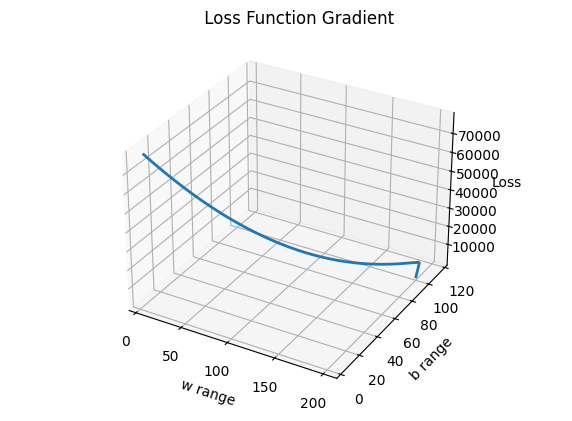

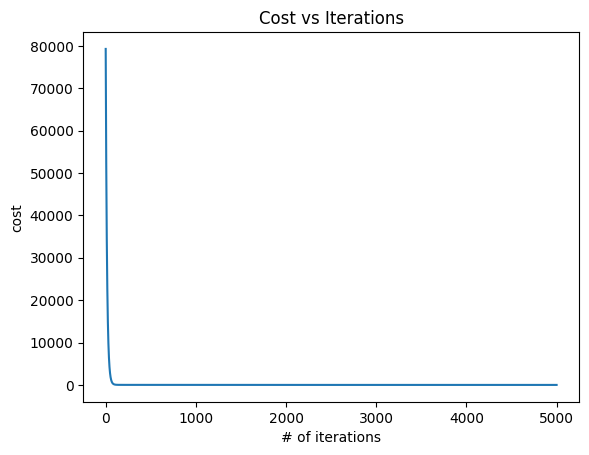

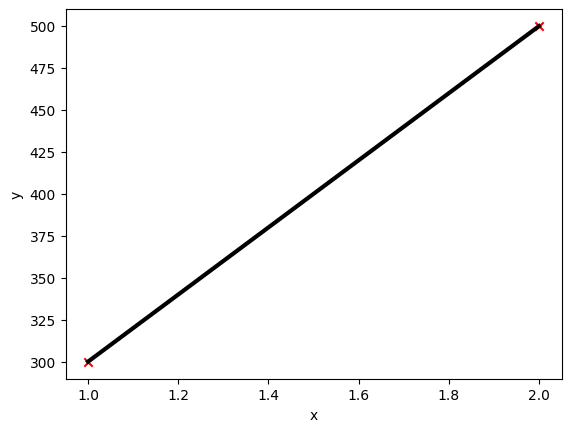

In [177]:
x = np.array([1.0, 2.0])   #features
y = np.array([300.0, 500.0])   #target value
if(len(x) != len(y)):
    print("List of features is not equal to outputs given in the dataset")
    exit()

w_init = 0
b_init = 0
iterations = 5000
learning_rate = 0.01
w, b, j_wb_hist, w_hist, b_hist = create_model(x, y, w_init, b_init, iterations, learning_rate,10)
print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")
print("mean squared loss is ",'{:.6f}'.format(calc_mean_squared_loss(x,y,w_hist[-1],b_hist[-1])))
plot_loss_gradient(w_hist,b_hist,j_wb_hist)
plot_cost_vs_iterations(j_wb_hist)
plot_final(x,y,w,b)
